In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 화면을 보고 실습 코드를 작성해주세요.

In [ ]:
class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # 가중치 초기화
        self.W_f = np.random.randn() * 0.01
        self.b_f = np.zeros()

        self.W_i = np.random.randn() * 0.01
        self.b_i = np.zeros()

        self.W_C = np.random.randn() * 0.01
        self.b_C = np.zeros()

        self.W_o = np.random.randn() * 0.01
        self.b_o = np.zeros()


In [ ]:
        def sigmoid(self, x):
          return 1 / (1 + np.exp(-x))

        def tanh(self, x):
          return np.tanh(x)


# 화면을 보고 실습 코드를 작성해주세요.

In [ ]:
        def forward(self, x_t, h_prev, C_prev):
          """
          LSTM셀의 순전파 연산 수행
          :param x_t: 현재 입력 (shape: input_size)
          :param h_prev: 이전 은닉 상태 (shape: hidden_size)
          :param C_prev: 이전 셀 상태 (shape: hidden_size)
          :return: h_t, C_t (현재 은닉 상태와 셀 상태)
          """

          # 입력과 이전 은닉 상태를 연결
          concat = np.vstack()  # (hidden_size + input_size, 1)

          # 망각 게이트
          f_t = self.sigmoid()

          # 입력 게이트
          i_t = self.sigmoid()
          C_tilde = self.tanh()

          # 새로운 셀 상태
          C_t = f_t * C_prev + i_t * C_tilde

          # 출력 게이트
          o_t = self.sigmoid()
          h_t = o_t * self.tanh(C_t)

          return h_t, C_t, f_t, i_t, o_t, C_tilde


          # 입력 차원 및 은닉 상태 차원 정의
          input_size = 3
          hidden_size = 5
          seq_length = 10  # 시퀀스 길이

          # LSTM 셀 초기화
          lstm_cell = LSTMCell()

          # 초기 은닉 상태 및 셀 상태
          h_t = np.zeros()
          C_t = np.zeros()

          # 더미 입력 데이터 (랜덤)
          np.random.seed(0)
          inputs = [np.random.randn() for _ in range()]

          # 시퀀스 처리 및 값 저장
          h_states = []
          C_states = []
          forget_gates = []
          input_gates = []
          output_gates = []
          cell_candidates = []

          for x_t in inputs:
            h_t, C_t, f_t, i_t, o_t, C_tilde = lstm_cell.forward(x_t, h_t, C_t)
            h_states.append(h_t.flatten())
            C_states.append(C_t.flatten())
            forget_gates.append(f_t.flatten())
            input_gates.append(i_t.flatten())
            output_gates.append(o_t.flatten())
            cell_candidates.append(C_tilde.flatten())



In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input


# 화면을 보고 실습 코드를 작성해주세요.

In [ ]:
#  애플(AAPL) 주가 데이터 다운로드
stock_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
data = stock_data[['Close']].values

# 데이터 정규화
scaler = MinMaxScaler()
data_scaled =

/tmp/ipython-input-62560290.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


# 화면을 보고 실습 코드를 작성해주세요.

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.2031 - val_loss: 0.0677
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0099 - val_loss: 0.0179
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0033 - val_loss: 0.0098
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0

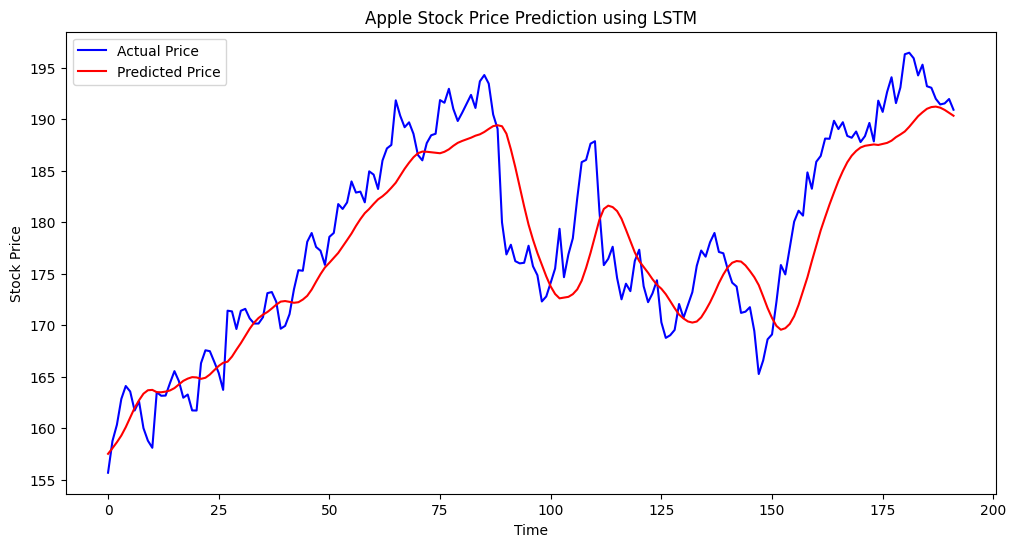

In [ ]:
# 시퀀스 데이터 생성
def create_sequences():
  X, y = [], []
  for i in range(len(data) - seq_length):




seq_length =50
X, y = create_sequences(data_scaled, seq_length)

# 훈련/테스트 데이터 분할
train_size =
X_train, y_train =
X_test, y_test =

# LSTM 모델 구축
model = Sequential([
    Input(shape=(seq_length, 1)),  #추가됨
    LSTM(units=50, return_sequences=True),
    LSTM(units=50, return_sequences=False),
    Dense(units=25, activation='relu'),
    Dense(units=1)
    ])

model.compile(optimizer=Adam(learning_rate=), loss='')
model.fit(X_train, y_train, epochs=, batch_size=, validation_data=(), verbose=1)

# 예측 수행
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Price", color='blue')
plt.plot(predictions, label="Predicted Price", color='red')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Apple Stock Price Prediction using LSTM")
plt.legend()
plt.show()